# Classification

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [4]:
x, y = mnist["data"], mnist["target"]

In [5]:
x = x[:30000]

In [6]:
y = y[:30000]

In [7]:
x.shape
# 784 here depicts the 28*28 pixels used for each image

(30000, 784)

In [8]:
y.shape

(30000,)

In [9]:
# Lets us try printing an image using matplotlib (this array contains shades of grey)

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
random_digit = x[1234]

In [12]:
# To get an image we need to reshape the array into 28*28 matrix

In [13]:
random_digit_image = random_digit.reshape(28,28)

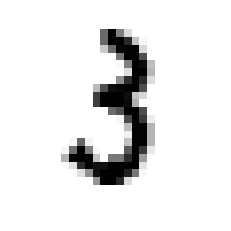

In [14]:
plt.imshow(random_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
y[1234]

'3'

In [16]:
# Creating a testing and training dataset
x_train, x_test, y_train, y_test = x[:20000], x[20000:], y[:20000], y[20000:]

###### Shuffling the training data set to prevent bias in the dataset (to try this for time series data)

In [17]:
shuffle_index = np.random.permutation(20000)

In [18]:
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

###### First we try training a binary classifier (whether it is a 3 or not)

In [19]:
y_train

array(['6', '5', '1', ..., '4', '9', '3'], dtype=object)

In [20]:
y_train_3 = (y_train == '3') #true for all y == 3 and false otherwise

### Using stochastic gradient descent for classification

In [21]:
# This classifier has the advantage of being capable of handling very large datasets efficiently.
# This is in part because SGD deals with training instances independently, one at a time
# (which also makes SGD well suited for online learning)

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
sgd_clf.predict([random_digit])

array([False])

### Checking models performance

In [25]:
# Measuring performance of a classifier is lot tougher than measuring for a regressor

###### Measuring accuracy using cross-validation

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_3):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_3[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_3[test_index])
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    
# The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
# At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes
# predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

C:\Users\bhara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9173541322933854
0.9430028498575072
0.8727872787278728


In [28]:
import psutil
print(psutil.virtual_memory())

svmem(total=8424574976, available=2041339904, percent=75.8, used=6383235072, free=2041339904)
